## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [5]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


### Find no.of samples are there in training and test datasets

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [10]:
y_test.shape

(10000,)

In [11]:
y_train.shape

(60000,)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [0]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
  # Define model
    model = Sequential()


    

In [19]:
 # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


In [20]:

    # 2nd Conv Layer
    model.add(Convolution2D(33, 3, 3))
    model.add(Activation('relu'))

   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(33, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
 # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

    

In [0]:
   # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))



In [0]:
     # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    


In [0]:
    # Store Training Results
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    


In [25]:
  # Train the model2
    model.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.3902 - acc: 0.8583 - val_loss: 0.3447 - val_acc: 0.8716
Epoch 2/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.2454 - acc: 0.9091 - val_loss: 0.2570 - val_acc: 0.9071
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1837 - acc: 0.9314 - val_loss: 0.2550 - val_acc: 0.9145
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1355 - acc: 0.9490 - val_loss: 0.2644 - val_acc: 0.9106
Epoch 5/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0951 - acc: 0.9650 - val_loss: 0.2951 - val_acc: 0.9128
Epoch 6/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0654 - acc: 0.9756 - val_loss: 0.3341 - val_acc: 0.9121
Epoch 7/10
60000/60000 [==============================] - 11s 182us/

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [27]:
     # Define model
    model2 = Sequential()


     # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))


    # 2nd Conv Layer
    model2.add(Convolution2D(33, 3, 3))
    model2.add(Activation('relu'))

    
        # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model2.add(Dropout(0.25))
    
     # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))
    
       # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))
    
         # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
        # Store Training Results
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]
    

    
    

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(33, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [28]:
   # Train the model2
    model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3930 - acc: 0.8587 - val_loss: 0.2905 - val_acc: 0.8966
Epoch 2/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.2588 - acc: 0.9061 - val_loss: 0.2562 - val_acc: 0.9064
Epoch 3/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.2155 - acc: 0.9194 - val_loss: 0.2311 - val_acc: 0.9160
Epoch 4/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.1787 - acc: 0.9332 - val_loss: 0.2338 - val_acc: 0.9148
Epoch 5/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1525 - acc: 0.9432 - val_loss: 0.2387 - val_acc: 0.9186
Epoch 6/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1269 - acc: 0.9525 - val_loss: 0.2273 - val_acc: 0.9229
Epoch 7/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1119 - acc: 0.9585 - val_loss: 0.2349 - 

### Now, to the above model, lets add Data Augmentation 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

### Import the ImageDataGenrator from keras and fit the training images

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

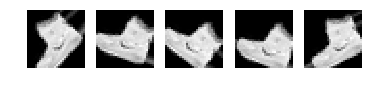

In [32]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [36]:
   # Fit Generator
    model2.fit_generator(datagen.flow(x_train,y_train,
                         batch_size=32), 
                         samples_per_epoch=x_train.shape[0],
                         nb_epoch=10,
                         validation_data=(x_test,y_test), callbacks=callback_list)

Epoch 1/10
  20/1875 [..............................] - ETA: 16s - loss: 2.3768 - acc: 0.4047

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<tensorfl..., steps_per_epoch=1875, epochs=10)`
  """


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6949 - acc: 0.7458 - val_loss: 0.3225 - val_acc: 0.8859
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5294 - acc: 0.8033 - val_loss: 0.3065 - val_acc: 0.8923
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4774 - acc: 0.8240 - val_loss: 0.3233 - val_acc: 0.8870
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4478 - acc: 0.8349 - val_loss: 0.3156 - val_acc: 0.8886
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4277 - acc: 0.8424 - val_loss: 0.3219 - val_acc: 0.8883
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4099 - acc: 0.8477 - val_loss: 0.2981 - val_acc: 0.8948
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4013 - acc: 0.8523 - val_loss: 0.3176 - val_acc: 0.8862
Epoch 8/10
1875/1875 [==============================] - 19s

###  Report the final train and validation accuracy

In [39]:
print(model2.evaluate(x_train,y_train))

60000/60000 [==============================] - 3s 55us/step
[0.265594189286232, 0.9029]


In [40]:
print(model2.evaluate(x_test,y_test))

10000/10000 [==============================] - 1s 55us/step
[0.31609711174964905, 0.8901]
